# Analysis of small DC panel

In this notebook, we determine the congruence of manual and clustering-based cell type annotation. We further perform a run of ConvexGating on a subset of dendritic cells.

## Load packages

In [2]:
!which python

/opt/python/bin/python


We use the `convexgating` tool to compute gates for a simple flow data set with a monocyte panel.

In [3]:
import convexgating as cg
import os

In [4]:
import scanpy as sc
import anndata as ann
import pandas as pd

In [5]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import numpy as np

In [6]:
sc.logging.print_versions()
sc.settings.verbosity = 3 

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.8.0
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                         8.4.0
anyio                       NA
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
brotli                      1.0.9
certifi                     2021.10.08
cffi                        1.15.0
charset_normalizer          2.0.7
cloudpickle                 2.0.0
convexgating

In [7]:
import datetime

In [8]:
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

## Read data

In [9]:
adata = sc.read('./../data/Hofer_IMA/mono_merge_annotated.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 1427516 × 6
    obs: 'sample', 'FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'CD14-FITC B525-FITC-H', 'CD1c-PE Y585-PE-H', 'HLA-DR-PE-Cy5 Y675-PC5-H', 'CD16-APC R660-APC-H', 'CD19-20-AF700 R712-APCA700-H', 'CD5-BV711 V763-H', 'FSC-Width', 'Time', 'gate_root', 'gate_LymphoMono', 'gate_non B-cells', 'gate_singlets', 'gate_non HLA-DR', 'gate_CD1c+', 'gate_Q1: CD14-FITC B525-FITC-A- , CD5-BV711 V763-A+', 'gate_Q2: CD14-FITC B525-FITC-A+ , CD5-BV711 V763-A+', 'gate_Q3: CD14-FITC B525-FITC-A+ , CD5-BV711 V763-A-', 'gate_Q4: CD14-FITC B525-FITC-A- , CD5-BV711 V763-A-', 'gate_class. Mono', 'gate_intermed. Mono', 'gate_non-class. Mono', 'batch', 'manual annotation level 1', 'manual annotation level 2', 'leiden', 'cell_types', 'cell_types_lvl2'
    var: 'channel', 'marker', 'signal_type'
    uns: 'cell_types_colors', 'cell_types_lvl2_colors', 'dendrogram_cell_types', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'manual annotation level 1_colors', 'manual annotation 

## Determine congruence of manual and cluster-based cell type annotation

In [11]:
pd.crosstab(adata.obs['cell_types_lvl2'], adata.obs['sample'])

sample,KR,KW,MF
cell_types_lvl2,,,
B cell,28701,52658,56883
classical monocyte,68298,102010,56957
non-classical monocyte,2742,4954,4613
intermediate monocyte,2586,2355,1951
"DC Q1(CD14-, CD5+)",622,420,1089
"DC Q3(CD14+, CD5-)",1052,1370,1403
"DC Q4(CD14-, CD5-)",775,404,951
not annotated,351636,365249,317837


Plot the cell type annotation. First row depicts the clustering annotation and the second row depicts the manual annotation.

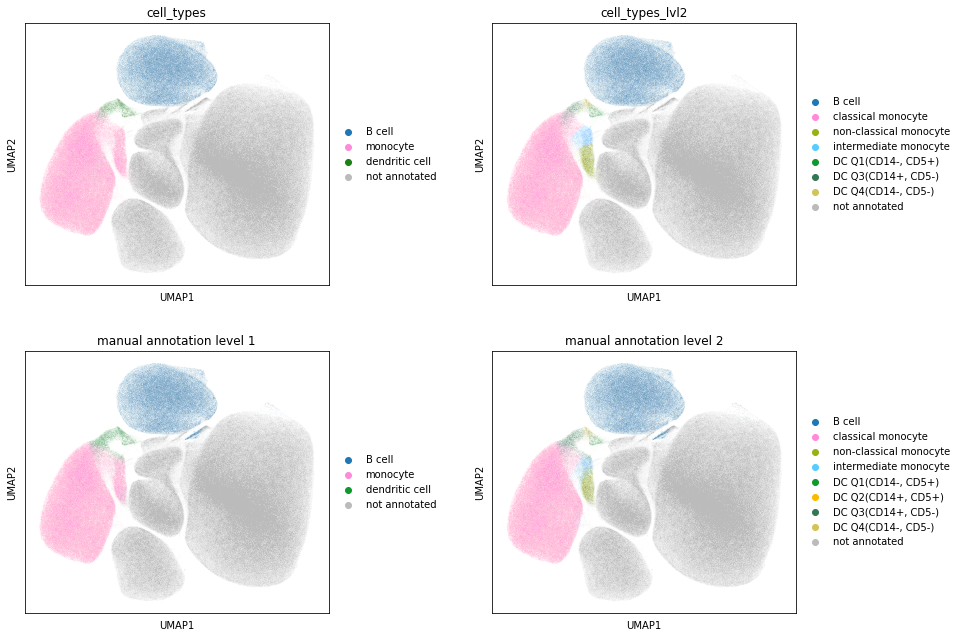

In [11]:
rcParams['figure.figsize'] = (5,5)
sc.pl.umap(adata, color=['cell_types', 'cell_types_lvl2',
                         'manual annotation level 1', 'manual annotation level 2'], 
           wspace=0.4, ncols=2)

Compare manual annotation and clustering annotation.

In [17]:
adata.obs['cell_types_lvl2'] = adata.obs['cell_types_lvl2'].cat.add_categories([ 'DC Q2(CD14+, CD5+)'])

In [18]:
adata.obs['cell_types_lvl2'] = adata.obs['cell_types_lvl2'].cat.reorder_categories(adata.obs['manual annotation level 2'].cat.categories)

In [19]:
adata.obs['cell_types_lvl2'].cat.categories

Index(['B cell', 'classical monocyte', 'non-classical monocyte',
       'intermediate monocyte', 'DC Q1(CD14-, CD5+)', 'DC Q2(CD14+, CD5+)',
       'DC Q3(CD14+, CD5-)', 'DC Q4(CD14-, CD5-)', 'not annotated'],
      dtype='object')

In [20]:
pd.crosstab(adata.obs['manual annotation level 2'], adata.obs['cell_types_lvl2'])

cell_types_lvl2,B cell,classical monocyte,non-classical monocyte,intermediate monocyte,"DC Q1(CD14-, CD5+)","DC Q3(CD14+, CD5-)","DC Q4(CD14-, CD5-)",not annotated
manual annotation level 2,,,,,,,,
B cell,138096,26,5,4,2,0,0,3541
classical monocyte,0,222895,4,786,0,78,0,710
non-classical monocyte,0,165,9438,813,0,0,0,104
intermediate monocyte,0,762,957,4404,0,0,0,5
"DC Q1(CD14-, CD5+)",8,0,0,0,1622,0,22,1
"DC Q2(CD14+, CD5+)",0,31,0,23,105,56,32,22
"DC Q3(CD14+, CD5-)",1,2799,1,784,9,3616,429,0
"DC Q4(CD14-, CD5-)",48,0,2,0,210,15,1449,49
not annotated,89,587,1902,78,183,60,198,1030290


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
cm = confusion_matrix(adata.obs['manual annotation level 2'], 
                      adata.obs['cell_types_lvl2'], 
                      labels=adata.obs['manual annotation level 2'].cat.categories)

In [14]:
norm_cm = np.sum(cm, axis=1)
#norm_cm[-1]=1

Normalize by the total number of gated events.

In [15]:
cm2 = np.round(cm.T/norm_cm*100,2).T

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, 
                              display_labels= adata.obs['manual annotation level 2'].cat.categories
                             )


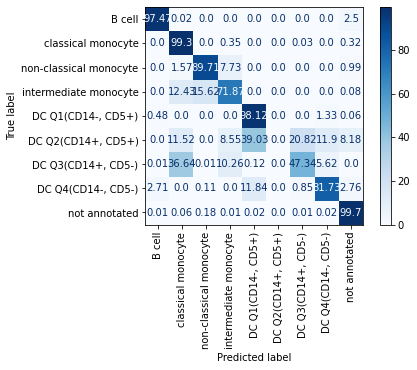

In [18]:
 plt.rcParams.update({'font.size':7})
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='')
plt.savefig(f'./figures/confusion_matrix_{today}.png', bbox_inches='tight')
plt.savefig(f'./figures/confusion_matrix_{today}.pdf', bbox_inches='tight')
plt.show()

## Run Convex Gating for DC Q1

Here we run convex gating manually for DC Q1, because we face the issue of insufficient cell numbers upon downsampling to 50,000 cells. 

Let us keep all cells and subsample the remaining cells such that we have 50,000 cells in total.

KR


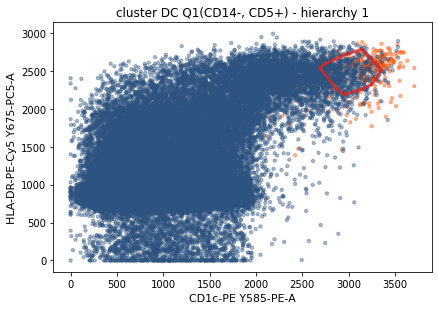

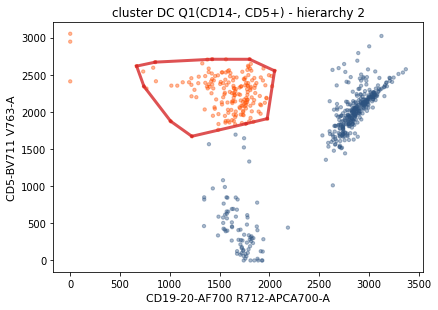

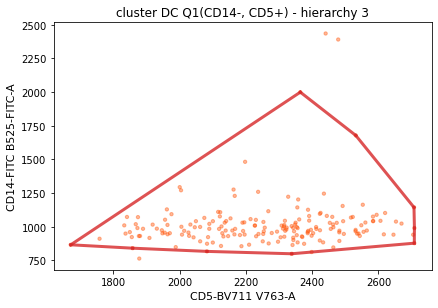

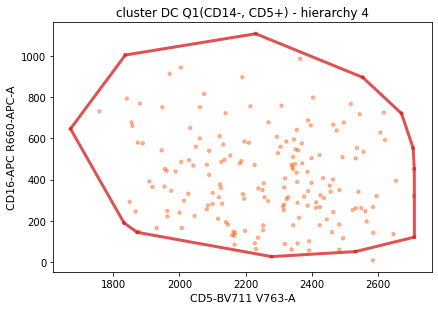

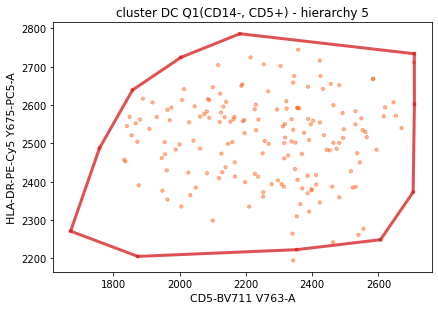

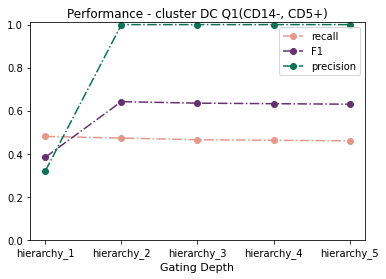

KW


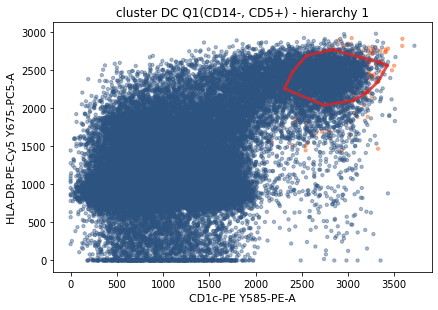

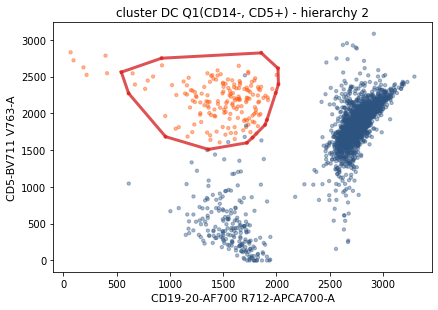

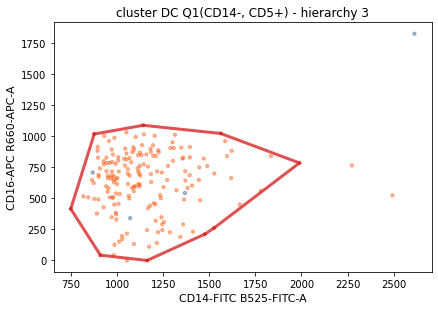

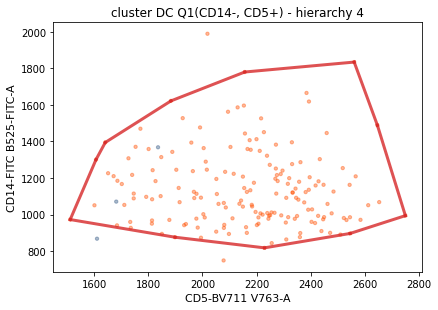

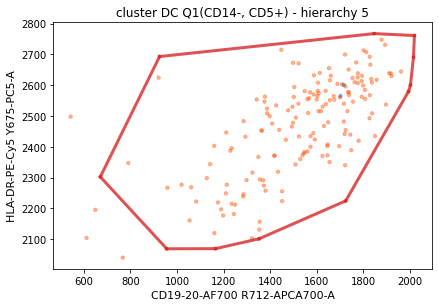

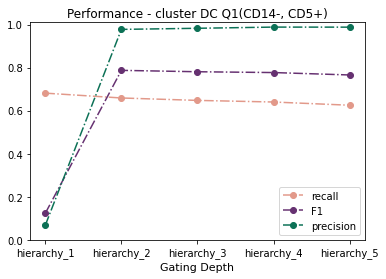

MF


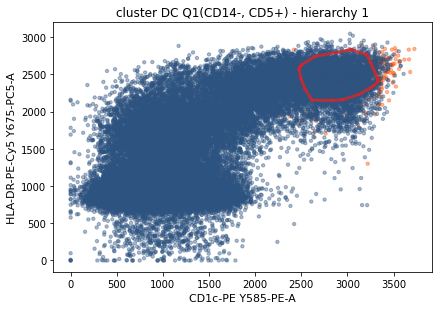

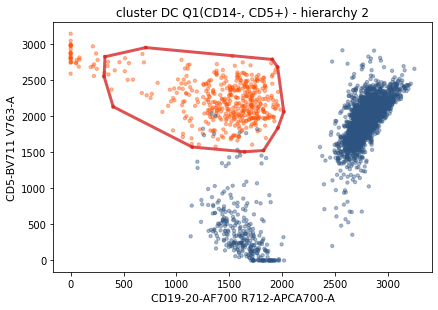

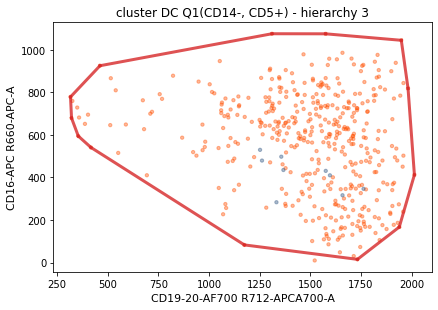

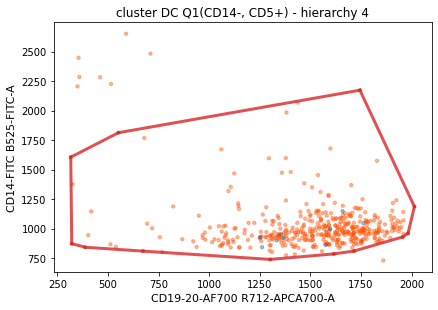

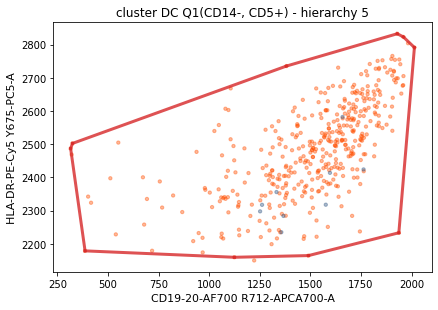

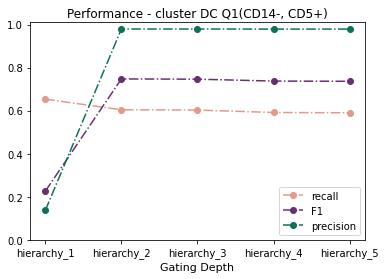

In [16]:
cluster_key = "cell_types_lvl2"
cell_type_key = "DC Q1(CD14-, CD5+)"
n_total = 50000
save_path = f"/groups/NovaSeq-01/bioinformatics/users/buettnerm/convex_gating/data/performance_test/convex_gating/Hofer_data/{cluster_key}/"

for sample in adata.obs['sample'].cat.categories:
    print(sample)
    adata_sample = adata[adata.obs['sample']==sample].copy()
    dc_idx = adata_sample.obs[cluster_key]==cell_type_key
    adata_dc = adata_sample[dc_idx].copy()
    adata_rest = adata_sample[np.invert(dc_idx)].copy()
    n_dc = np.sum(dc_idx)
    sc.pp.subsample(adata_rest, n_obs = n_total - n_dc)
    adata_cg = ann.concat([adata_dc, adata_rest], index_unique=None)
    cg.tools.CONVEX_GATING(adata = adata_cg, 
                           cluster_numbers = [cell_type_key],
                           cluster_string = cluster_key,
                           save_path = '{}/cluster_{}_batch_{}/'.format(save_path, cell_type_key, sample))
                           

End of this notebook.